<a href="https://colab.research.google.com/github/drskprabhakar/AI-ML-DL-colab-notebooks-coding-models/blob/main/1324Binary_Fundus_laterality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("/content/drive/MyDrive/fundus laterality images datasets"))

# Any results you write to the current directory are saved as output


['training set', 'testing set', 'validation set']


In [ ]:
# Initialising the CNN
model = Sequential()

# Step 1 - Convolution
model.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
model.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a third convolutional layer
model.add(Conv2D(128, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a fourth convolutional layer
model.add(Conv2D(128, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
model.add(Flatten())

# Step 4 - Full connection
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/fundus laterality images datasets/training set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

validation_set = test_datagen.flow_from_directory('/content/drive/MyDrive/fundus laterality images datasets/validation set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')



Found 24 images belonging to 2 classes.
Found 8 images belonging to 2 classes.


In [ ]:
model.fit(training_set,
          batch_size=10,
          steps_per_epoch=10,
          epochs = 10,
          validation_data = validation_set)


Epoch 1/10
 1/10 [==>...........................] - ETA: 13s - loss: 0.6551 - accuracy: 0.7917

10/10 [==============================] - 2s 105ms/step - loss: 0.6551 - accuracy: 0.7917 - val_loss: 0.7468 - val_accuracy: 0.5000


1/1 [==============================] - 0s 23ms/step
[[0.]]
{'LE fundus': 0, 'RE fundus': 1}
RE fundus


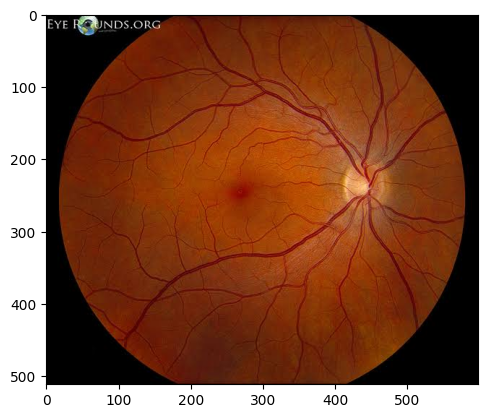

In [ ]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/images (6).jpeg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
print(result)
print(training_set.class_indices)
if result[0][0] == 1:
    prediction = 'LE fundus'
else:
    prediction = 'RE fundus'
print(prediction)

img = Image.open('/content/drive/MyDrive/images (13).jpeg')
plt.imshow(img)